#Import modules

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
import pickle
from sklearn.metrics import roc_curve, auc
from matplotlib import rcParams
from sklearn import metrics
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.impute import SimpleImputer
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Extract and view data

In [4]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, names = heading)

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
#income this is the last feature so the output has already been included okay so this makes it supervised machine learning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# let us just see the shape of this data set so we will see the shape and we see that there are 32 561 rows and 15 columns

print(df.shape)

(32561, 15)


In [8]:
#that means how many i want to find out the the is null total number of zero or null entries now this is showing me that there are no null values in either of the features

df.apply(lambda x:sum(x.isnull()))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
# Now i will return a scalar value which is the count of all the unique values in the Index.

df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [10]:
#Pandas describe() is used to view some basic statistical details
# .T just for visualisation

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#Value count function

In [11]:
# Now with  value_counts() function we will return object containing counts of unique values.

df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [16]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [17]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [18]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



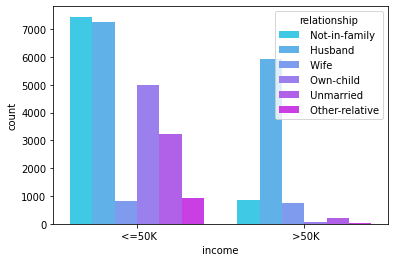

In [19]:
#Seaborn literally counts the number of observations per category for a categorical variable, and displays the results as a bar chart and countplot creating horizontal plot

sns.countplot(df['income'], palette='cool', hue='relationship', data=df);

In [20]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [21]:
print(len(df.corr().columns))

6


In [22]:
#also i want to see something regarding correlation
#and we see that the figure that there is no as such high positive correlation

df.corr(method='pearson', min_periods=1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [23]:
df['age']

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

#Finding the outliers if any? BoxPlot

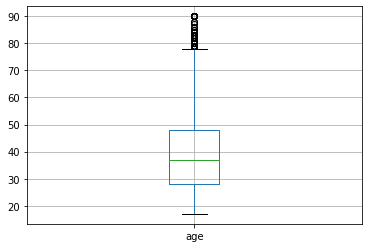

In [24]:
df.boxplot(column='age')

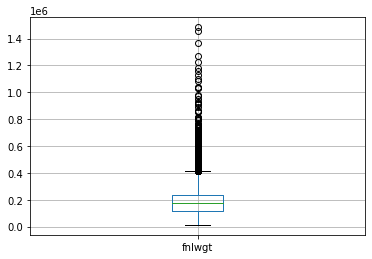

In [25]:
df.boxplot(column='fnlwgt')

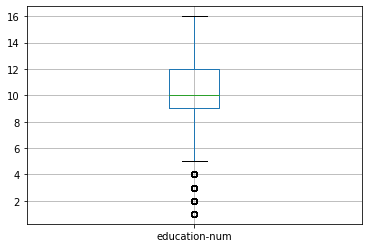

In [26]:
df.boxplot(column='education-num')

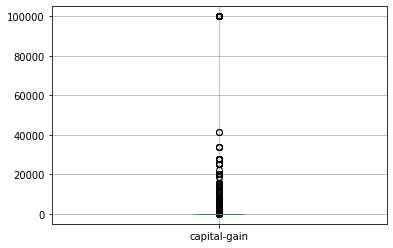

In [27]:
df.boxplot(column='capital-gain')

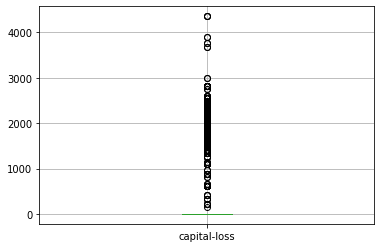

In [28]:
df.boxplot(column='capital-loss')

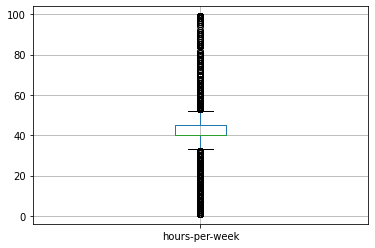

In [29]:
df.boxplot(column='hours-per-week')

#Data Visualisation

In [30]:
px.pie(df, values='education-num', names='education', 
      color_discrete_sequence = px.colors.qualitative.T10)


In [31]:
from collections import Counter

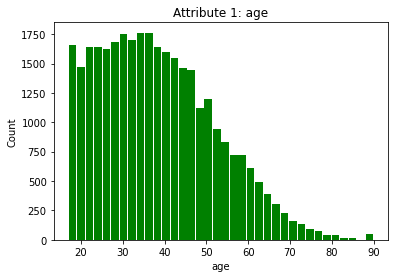

In [32]:
#AGE HISTOGRAM

attr = 0
attribute = pd.Series(df.iloc[:,attr].values )
fig = plt.figure()
distinct = set(df.iloc[:,attr].values)
attribute.plot.hist(bins=int(len(distinct)/2), rwidth=0.9,
                   color='g')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show() 

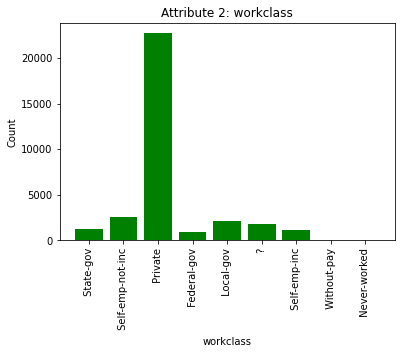

In [33]:
#WORKCLASS HISTOGRAM

attr = 1
freqs = Counter(df.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='g')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

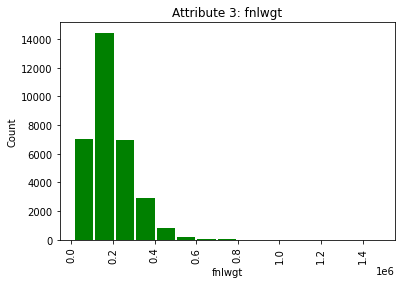

In [34]:
#FNLWGT HISTOGRAM

attr = 2
attribute = pd.Series(df.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=15, rwidth=0.9,
                   color='g')
plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show() 

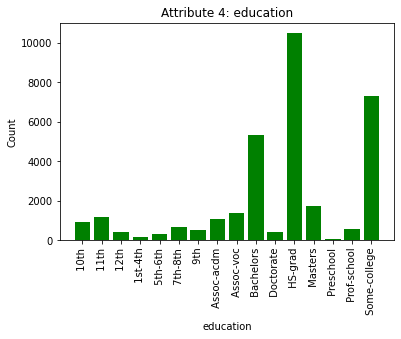

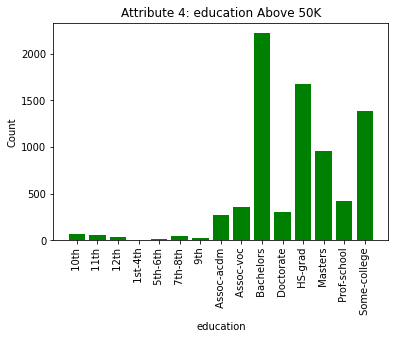

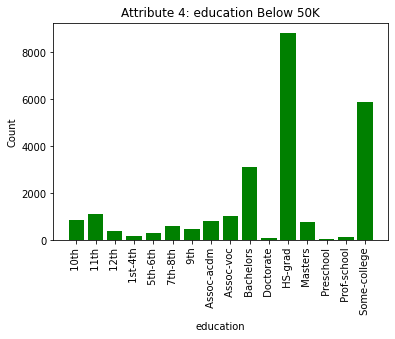

In [35]:
#EDUCATION HISTOGRAM

attr = 3
freqs = Counter(df.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

above_50 = df.loc[df["income"].values == " >50K"]
freqs = Counter(above_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals,sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Above 50K'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

below_50 = df.loc[df["income"].values == " <=50K"]
freqs = Counter(below_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Below 50K'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

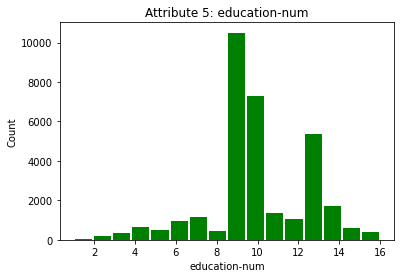

In [36]:
#EDUCATION-NUM HISTOGRAM

attr = 4
attribute = pd.Series(df.iloc[:,attr].values )
fig = plt.figure()
distinct = set(df.iloc[:,attr].values)
attribute.plot.hist(bins=len(distinct), rwidth=0.9,
                   color='g')
#plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

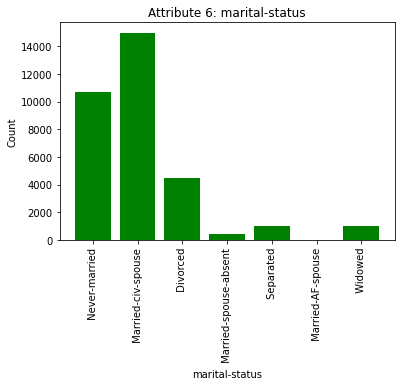

In [37]:
#MARITAL-STATUS HISTOGRAM

attr = 5
freqs = Counter(df.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='g')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

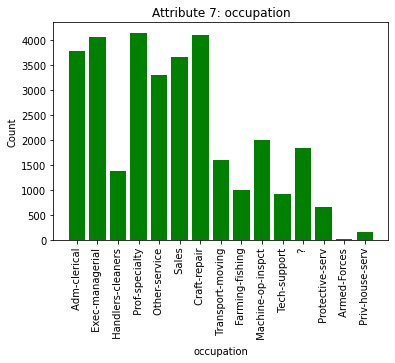

In [38]:
#OCCUPATION HISTOGRAM

attr = 6
freqs = Counter(df.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='g')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

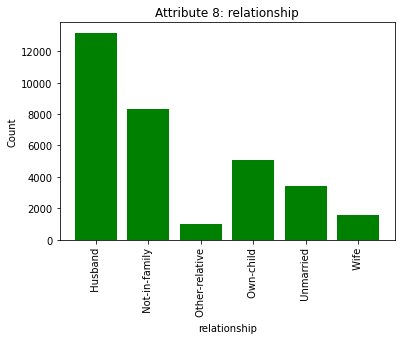

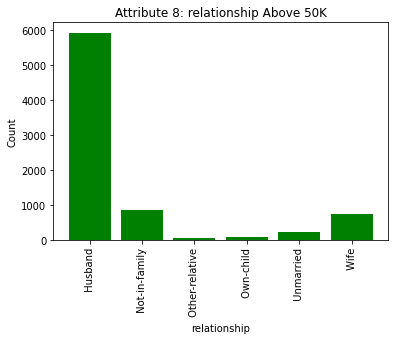

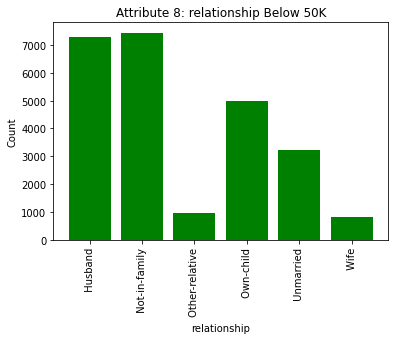

In [39]:
#RELATIONSHIP HISTOGRAM

attr = 7
freqs = Counter(df.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals , color='g')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()


above_50 = df.loc[df["income"].values == " >50K"]
freqs = Counter(above_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals,sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Above 50K'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()


below_50 = df.loc[df["income"].values == " <=50K"]
freqs = Counter(below_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Below 50K'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()


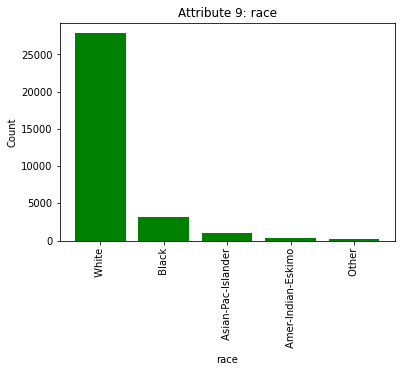

In [40]:
#RACE HISTOGRAM

attr = 8
freqs = Counter(df.iloc[:,attr].values)
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='g')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

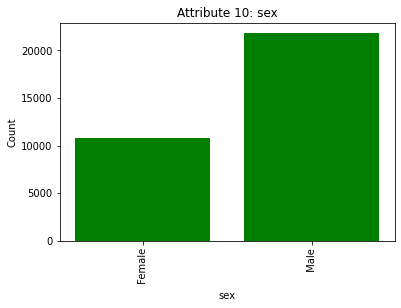

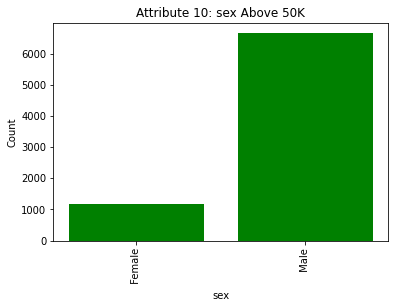

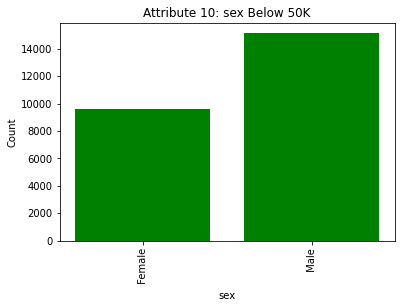

In [41]:
#SEX HISTOGRAM

attr = 9
freqs = Counter(df.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals , color='g')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

above_50 = df.loc[df["income"].values == " >50K"]
freqs = Counter(above_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals,sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Above 50K'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()


below_50 = df.loc[df["income"].values == " <=50K"]
freqs = Counter(below_50.iloc[:,attr].values)
sort_vals = [freqs[key] for key in sorted(freqs.keys())]
fig = plt.figure()
xvals = range(len(freqs.values()))
plt.bar(xvals, sort_vals, color='g')
plt.xticks(xvals, sorted(freqs.keys()),rotation='vertical')
plt.title('Attribute {}: {} Below 50K'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

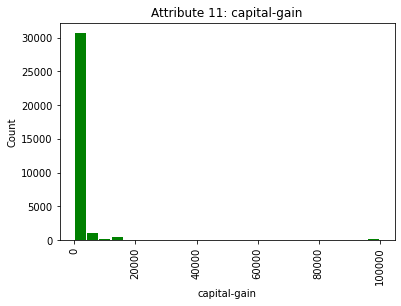

In [42]:
#CAPITAL-GAIN HISTOGRAM

attr = 10
attribute = pd.Series(df.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=25, rwidth=0.9,
                   color='g')
plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

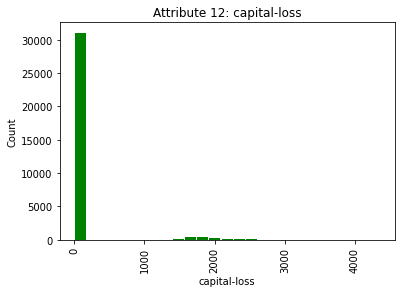

In [43]:
#CAPTIAL-LOSS HISTOGRAM

attr = 11
attribute = pd.Series(df.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=25, rwidth=0.9,
                   color='g')
plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

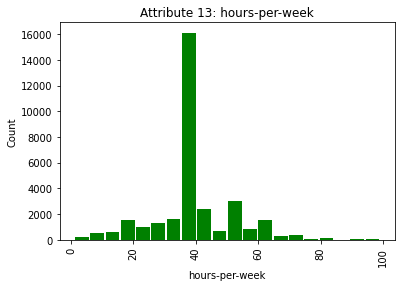

In [44]:
#HOURS-PER-WEEK HISTOGRAM

attr = 12
attribute = pd.Series(df.iloc[:,attr].values )
fig = plt.figure()
attribute.plot.hist(bins=20, rwidth=0.9,
                   color='g')

plt.xticks(rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

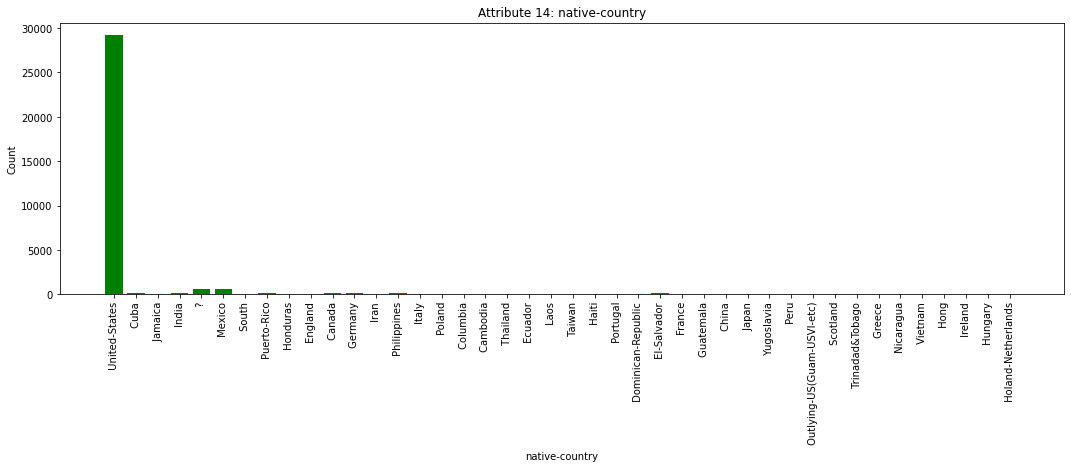

In [45]:
#NATIVE-COUNTRY HISTOGRAM

attr = 13
freqs = Counter(df.iloc[:,attr].values)
xvals = range(len(freqs.values()))
fig = plt.figure(figsize=(18, 5))
plt.bar(xvals, freqs.values(), color='g')
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.title('Attribute {}: {}'.format(attr+1, heading[attr]))
plt.xlabel('{}'.format(heading[attr]))
plt.ylabel('Count')
plt.show()

# Data Pre-processing

0 when INCOME <=50K

1 when INCOME >50

In [46]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, names = heading, na_values="?", skipinitialspace = True)

In [47]:
df['target'] = df['income']
df['target'] = np.where(df['income'].isin(['>50K']), 1, 0)

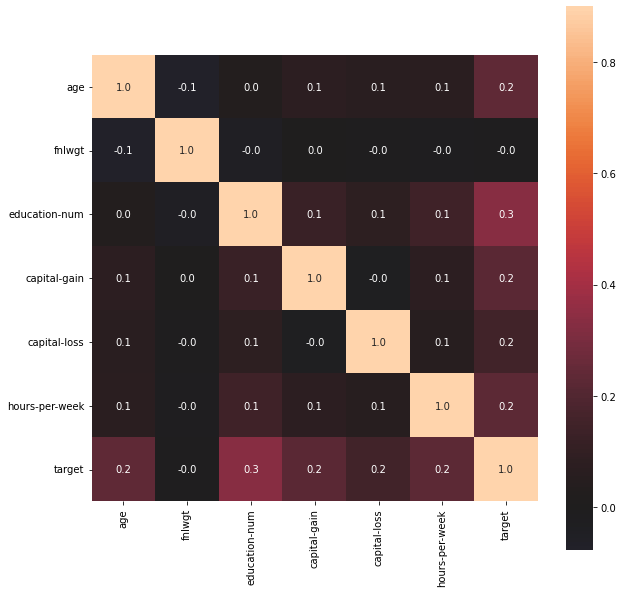

In [48]:
#Correlation matrix to identify their relation with income.

plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)
plt.show()

In [49]:
#I will drop FNLWGT beacuse has 0 corelation to target value

df = df.drop(['fnlwgt'], axis=1)

In [50]:
#I will drop education, beacuse Education and Education Number are the same

df.drop(['education'], axis = 1, inplace = True)

In [51]:
target = 'target'
num_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
features = df.columns.tolist()
features.remove(target)
X = df[features]
y = df[target]

In [52]:
def drawRocCurve(classifier, nameClassifier, X_test, y_test):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = classifier.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('Random model: ROC AUC=%.3f' % (ns_auc))
    print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, lr_fpr, lr_tpr

In [53]:
def GridSearch(param, estimator, X=X, y=y):
    '''GridSearch function split the data for training and test sets; fit data 
    for a given model and choose the best paramethers using GridSearchCV from sklearn.
    At the end this function return score raport for the prediction'''
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    return classification_report(y_test, grid_rf_predictions)

In [54]:
 def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show() 

In [55]:
def featuresToOther(column, dataframe = df, percent=0.05, name_for_other="Other"):
    
    '''This function change features under given threshold to one group. 
    The group is called by name_for_other, default- Other'''
    
    frame = dataframe[column].value_counts().to_frame()
    values =  dataframe[column].value_counts().index.tolist()
    sum_of_count = 0
    for n in range(len(frame.index)): 
        sum_of_count += frame.iloc[n]
    threshold = sum_of_count.iloc[0]*percent
    list_values_to_change= []
    for i in range(len(frame.index)):
        num = frame.iloc[i, 0]
        if(num < threshold):
            list_values_to_change.append(values[i])
    dataframe[column].replace(list_values_to_change, name_for_other, inplace = True)

In [56]:
insignificant_values = ['workclass', 'occupation', 'race', 'native-country']
for value in insignificant_values:
    featuresToOther(column=value, dataframe=df, percent=0.04)

In [57]:
target = 'target'
num_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
features = df.columns.tolist()
features.remove(target)
X = df[features]
y = df[target]

In [58]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
    ('onehot', SklearnOneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

#Classification

##Decision Tree Classifier

model score: 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



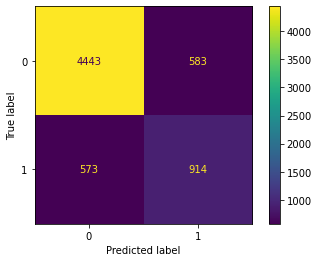

In [59]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  DecisionTreeClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.770


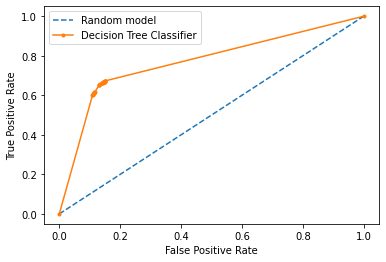

In [60]:
lr_auc_tree, lr_fpr_tree, lr_tpr_tree = drawRocCurve(clf, "Decision Tree Classifier", X_test, y_test)

##Random Forest Classifier

{'classifier__max_depth': 20, 'classifier__max_features': 10, 'classifier__n_estimators': 500}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



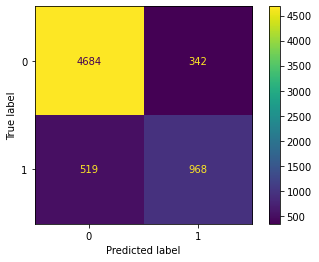

In [61]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  RandomForestClassifier())])
param = {'classifier__max_depth': [2, 20],
         'classifier__n_estimators': [100, 500],
         'classifier__max_features': [10 , 20]}
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print(best_params)
ConfusionMatrix(classifier=gs, confusionMatrix=False)

{'classifier__max_depth': 20, 'classifier__max_features': 10, 'classifier__min_samples_split': 30}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



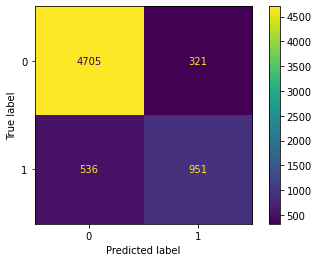

In [62]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  RandomForestClassifier())])
param = {'classifier__max_depth': [20, 50],
         'classifier__max_features': [10, 30],
         'classifier__min_samples_split': [10, 30]}
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print(best_params)
ConfusionMatrix(classifier=gs, confusionMatrix=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



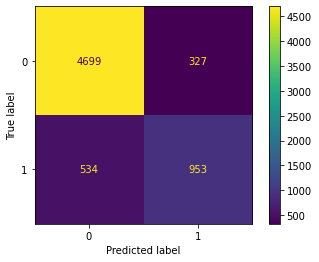

In [63]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  RandomForestClassifier(max_depth =  20,max_features =  10,
                                                             min_samples_split =  30,
                                                             n_estimators =  500))])
clf.fit(X_train, y_train)
clf.predict(X_test)
ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.916


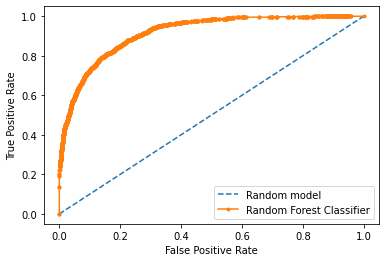

In [64]:
lr_auc_rf, lr_fpr_rf, lr_tpr_rf = drawRocCurve(clf, "Random Forest Classifier", X_test, y_test)

##Linear Regression Classifier

model score: 0.837


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



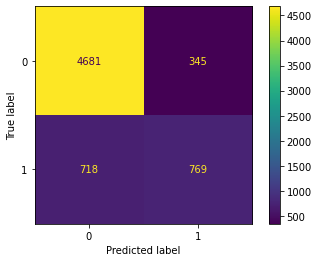

In [65]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  RidgeClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Linear Regression Classifier: ROC AUC=0.724


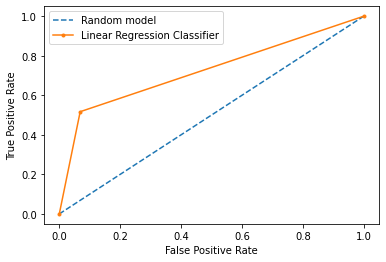

In [66]:
nameClassifier = "Linear Regression Classifier"
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random model: ROC AUC=%.3f' % (ns_auc))
print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
lr_auc_rc, lr_fpr_rc, lr_tpr_rc = lr_auc, lr_fpr, lr_tpr

##Logistic Regerssion Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



model score: 0.846


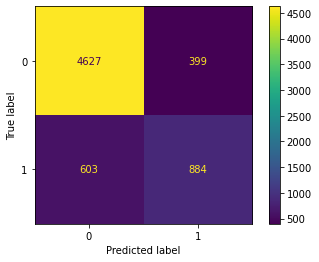

In [67]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Logistic Regression: ROC AUC=0.899


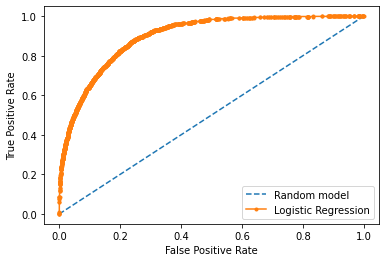

In [68]:
lr_auc_logr, lr_fpr_logr, lr_tpr_logr = drawRocCurve(clf, "Logistic Regression", X_test, y_test)

##k-Nearest Neighbours Classifier

{'knn__n_neighbors': 100, 'knn__p': 1, 'knn__weights': 'uniform'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



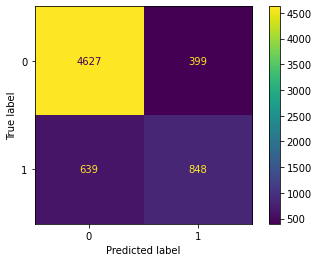

In [69]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn',  KNeighborsClassifier())])
param = {'knn__n_neighbors': [10, 100],
         'knn__weights': ['uniform', 'distance'],
         'knn__p': [1, 2]}
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print(best_params)
ConfusionMatrix(classifier=gs, confusionMatrix=False)

{'knn__n_neighbors': 100, 'knn__p': 1, 'knn__weights': 'uniform'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



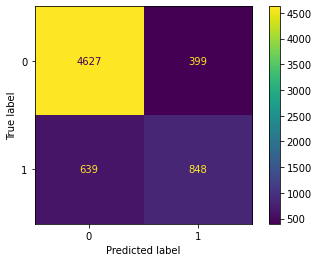

In [70]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn',  KNeighborsClassifier())])
param = {'knn__n_neighbors': [100, 500],
         'knn__weights': ['uniform'],
         'knn__p': [1]}
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print(best_params)
ConfusionMatrix(classifier=gs, confusionMatrix=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



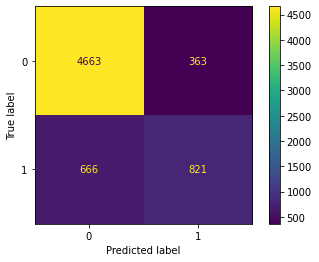

In [71]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn',  KNeighborsClassifier(n_neighbors=10, p=1, weights='uniform'))])
clf.fit(X_train, y_train)
clf.predict(X_test)
ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
K-Neighbors Classifier: ROC AUC=0.882


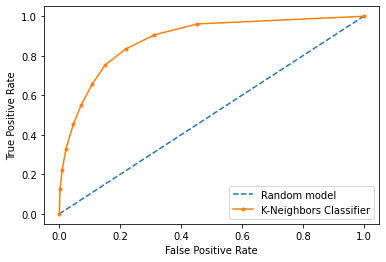

In [72]:
lr_auc_knn, lr_fpr_knn, lr_tpr_knn = drawRocCurve(clf, "K-Neighbors Classifier", X_test, y_test)

{'svc__C': 1, 'svc__kernel': 'poly'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



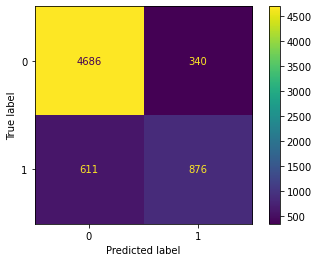

In [73]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('svc',  SVC())])
param = {'svc__C': [1, 10],
         'svc__kernel': ['linear', 'poly']}
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print(best_params)
ConfusionMatrix(classifier=gs, confusionMatrix=False)

{'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



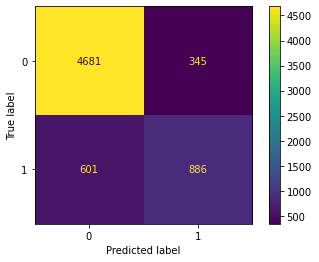

In [74]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('svc',  SVC())])
param = {'svc__kernel': ['poly', 'rbf'],
         'svc__gamma': ['scale', 'auto']
        }
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print(best_params)
ConfusionMatrix(classifier=gs, confusionMatrix=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



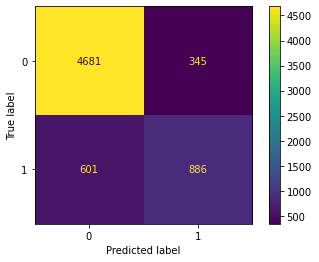

In [75]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('svc',  SVC(C = 1, kernel = "rbf", gamma = "scale", probability=True))])
clf.fit(X_train, y_train)
clf.predict(X_test)
ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
SVC: ROC AUC=0.894


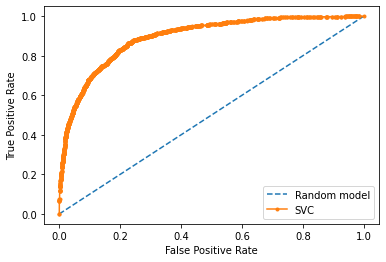

In [76]:
lr_auc_svm, lr_fpr_svm, lr_tpr_svm = drawRocCurve(clf, "SVC", X_test, y_test)

## Compare Classifiers

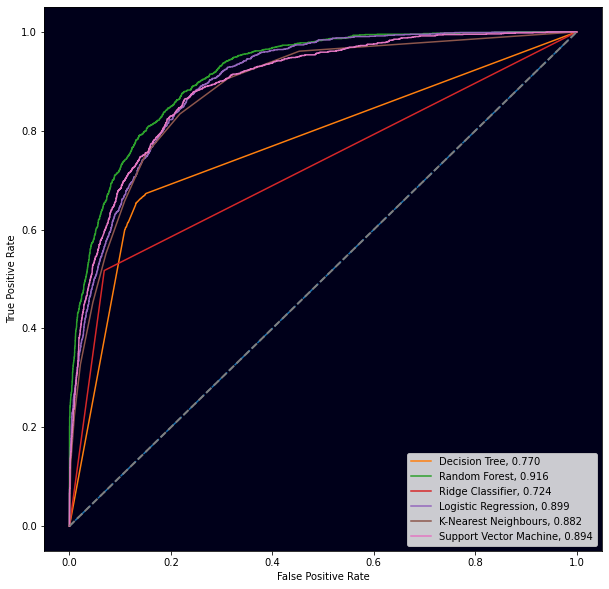

In [77]:
 # Determining the size of the drawing
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor((0,0,0.10))

#about Random model
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr_tree, lr_tpr_tree, label="Decision Tree, %.3f" % (lr_auc_tree))
plt.plot(lr_fpr_rf, lr_tpr_rf,  label="Random Forest, %.3f" % (lr_auc_rf))
plt.plot(lr_fpr_rc, lr_tpr_rc,  label="Ridge Classifier, %.3f" % (lr_auc_rc))
plt.plot(lr_fpr_logr, lr_tpr_logr, label="Logistic Regression, %.3f" % (lr_auc_logr))
plt.plot(lr_fpr_knn, lr_tpr_knn, label="K-Nearest Neighbours, %.3f" % (lr_auc_knn))
plt.plot(lr_fpr_svm, lr_tpr_svm,  label="Support Vector Machine, %.3f" % (lr_auc_svm))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [78]:
# Best score has Random Forest - 0,916

#Clustering

##K-Means Clustering

In [79]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, names = heading)

In [80]:
#Determine “k” value from the elbow method


According to the graph, we can see that the elbow starts at 2. Therefore, 2 is the optimal number of clusters.


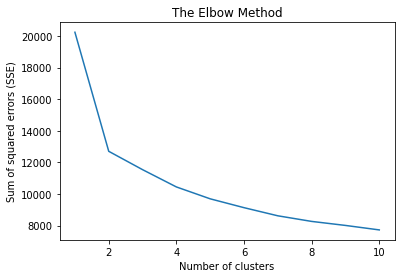

In [81]:
# iterate over all the attributes(columns) from the dataset
for attribute in df.columns:
    # check if the datatype of the attribute is an object
    if df.dtypes[attribute] == np.object:
        # use factorize function to represent string values as numeric values
        df[attribute], _ = pd.factorize(df[attribute])
        
# min max normalization
df = (df-df.min())/(df.max()-df.min())

# variable X contains all the attributes except 'Class'
X = df.iloc[:,0:14]   

# variable Y contains the target 'Class'
Y = df.iloc[:,14:15]

# create empty list to store the sum of squared error 
sse = []

# iterate from 1 to 10 clusters
for k in range(1, 11):
    # set kmeans for the kth number of clusters
    model = KMeans(n_clusters = k)
    # pass the data to the kmeans model
    model.fit(X)
    # store the sum of squared error in sse
    sse.append(model.inertia_)
    
print('\nAccording to the graph, we can see that the elbow starts at 2. Therefore, 2 is the optimal number of clusters.')
    
# plot the graph
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('The Elbow Method');



In [82]:
#Visualization for K-Means Clustering

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Cluster Centers:
[[ 2.71584451e-01  2.92569814e-01  1.17663186e-01  2.27198582e-01
   6.02615248e-01  2.35460993e-01  2.82570289e-01  4.22606383e-01
   7.23071809e-02  1.00000000e+00  5.43914216e-03  1.40969963e-02
   3.60916468e-01  3.21873378e-02]
 [ 3.07811951e-01  2.86300092e-01  1.21478529e-01  2.28688668e-01
   6.05316920e-01  1.53930941e-01  3.58134401e-01  2.53012048e-01
   4.86020168e-02 -9.60342916e-15  1.35956323e-02  2.32443278e-02
   4.23277627e-01  3.02642170e-02]]


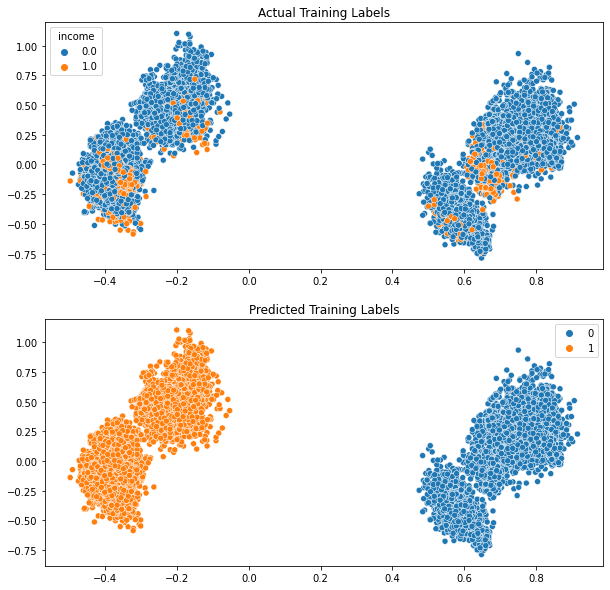

In [84]:
# Import PCA
from sklearn.decomposition import PCA

# set to 2 dimensions
pca = PCA(n_components = 2)

# Create the KMeans model

# set 2 clusters for kmeans model
model = KMeans(n_clusters = 2)

# pass the training data to the kmeans model
model.fit(X_train)

# Compute cluster centers and predict cluster index for each sample 

# compute cluster centers
print('Cluster Centers:')
print(model.cluster_centers_)

# predict training data
train_pred = model.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

plt.figure(figsize=(10, 10))

# scatter plot for actual training labels
plt.subplot(211)
plt.title('Actual Training Labels')
sns.scatterplot(x = x, y = y, hue = Y_train.income)

# scatter plot for predicted training labels
plt.subplot(212)
plt.title('Predicted Training Labels')
sns.scatterplot(x = x, y = y, hue = train_pred);



In [85]:
#Visualizing the predicted testing labels versus actual testing labels. Use the trained model in previous step.

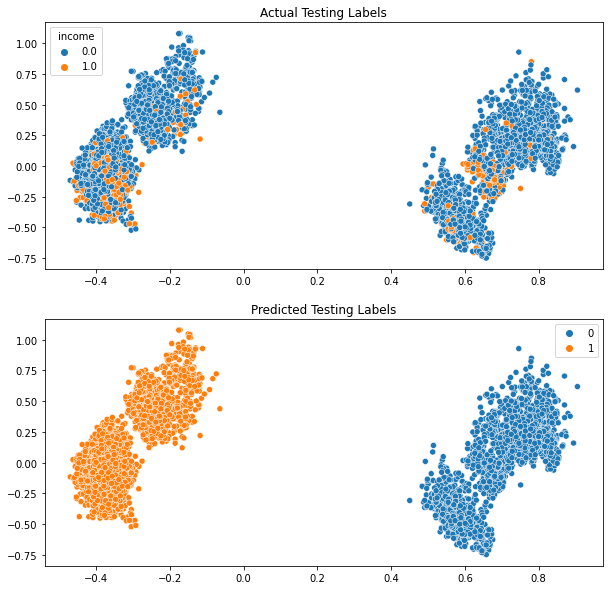

In [86]:
# predict cluster index for each sample 

# predict testing data
test_pred = model.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.figure(figsize=(10, 10))

# scatter plot for actual testing labels
plt.subplot(211)
plt.title('Actual Testing Labels')
sns.scatterplot(x = x, y = y, hue = Y_test.income)

# scatter plot for predicted testing labels
plt.subplot(212)
plt.title('Predicted Testing Labels')
sns.scatterplot(x = x, y = y, hue = test_pred);



In [87]:
#Evaluation of your clustering model and printing confusion matrix.

In [88]:
# print the confusion matrix for predicted training labels and actual training labels
print('confusion matrix (training dataset):')
print(confusion_matrix(Y_train, train_pred))

# print the confusion matrix for predicted testing labels and actual testing labels
print('\nconfusion matrix (testing dataset):')
print(confusion_matrix(Y_test, test_pred))

confusion matrix (training dataset):
[[ 6721 10592]
 [  799  4680]]

confusion matrix (testing dataset):
[[2871 4536]
 [ 380 1982]]


##Hierarchical Agglomerative Clustering

In [89]:
#Find the best Hierarchical Agglomerative Clustering Model

In [90]:
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

In [91]:
## Calculate pairwise distance matrix for X_train
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
pdm_train = pairwise_distances(X_train, metric='euclidean')
print('Pairwise Distance Matrix:')
#np.set_printoptions(threshold=np.inf)
print(np.matrix(pdm_train))

Pairwise Distance Matrix:
[[2.10734243e-08 1.29994552e+00 3.13388907e-01 ... 1.27895580e+00
  8.46551741e-01 5.06088035e-01]
 [1.29994552e+00 0.00000000e+00 1.29296237e+00 ... 7.26237853e-01
  1.46957929e+00 1.44045232e+00]
 [3.13388907e-01 1.29296237e+00 2.10734243e-08 ... 1.24379275e+00
  6.21141909e-01 4.16219986e-01]
 ...
 [1.27895580e+00 7.26237853e-01 1.24379275e+00 ... 2.98023224e-08
  1.37767813e+00 1.35162303e+00]
 [8.46551741e-01 1.46957929e+00 6.21141909e-01 ... 1.37767813e+00
  0.00000000e+00 6.97340276e-01]
 [5.06088035e-01 1.44045232e+00 4.16219986e-01 ... 1.35162303e+00
  6.97340276e-01 0.00000000e+00]]


In [92]:
## Model and fit the training data to the AgglomerativeClustering model
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
## complete linkage + cosine
complete_cos = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
complete_cos_pred = complete_cos.fit_predict(X_train)
complete_cos_f1 = f1_score(Y_train, complete_cos_pred, average='macro')
print("Confusion Matrix for complete linkage + cosine:")
print(confusion_matrix(Y_train,complete_cos_pred))

Confusion Matrix for complete linkage + cosine:
[[10592  6721]
 [ 4680   799]]


In [93]:
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(X)
complete_euc_pred = complete_euc.fit_predict(X_train)
complete_euc_f1 = f1_score(Y_train, complete_euc_pred, average='macro')
print("Confusion Matrix for complete linkage + euclidean:")
print(confusion_matrix(Y_train,complete_euc_pred))

Confusion Matrix for complete linkage + euclidean:
[[15845  1468]
 [ 5404    75]]


In [94]:
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_man = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete').fit(X)
complete_man_pred = complete_man.fit_predict(X_train)
complete_man_f1 = f1_score(Y_train, complete_man_pred, average='macro')
print("Confusion Matrix for complete linkage + manhattan:")
print(confusion_matrix(Y_train,complete_man_pred))

Confusion Matrix for complete linkage + manhattan:
[[ 6721 10592]
 [  799  4680]]


In [95]:
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
average_cos = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average').fit(X)
average_cos_pred = average_cos.fit_predict(X_train)
average_cos_f1 = f1_score(Y_train, average_cos_pred, average='macro')
print("Confusion Matrix for average linkage + cosine:")
print(confusion_matrix(Y_train,average_cos_pred))

Confusion Matrix for average linkage + cosine:
[[10592  6721]
 [ 4693   786]]


In [96]:
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(X)
average_euc_pred = average_euc.fit_predict(X_train)
average_euc_f1 = f1_score(Y_train, average_euc_pred, average='macro')
print("Confusion Matrix for average linkage + euclidean:")
print(confusion_matrix(Y_train,average_euc_pred))

Confusion Matrix for average linkage + euclidean:
[[17299    14]
 [ 5479     0]]


In [97]:
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_man = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average').fit(X)
average_man_pred = average_man.fit_predict(X_train)
average_man_f1 = f1_score(Y_train, average_man_pred, average='macro')
print("Confusion Matrix for average linkage + manhattan:")
print(confusion_matrix(Y_train,average_man_pred))

Confusion Matrix for average linkage + manhattan:
[[17310     3]
 [ 5479     0]]


In [98]:
print("F1-score for complete linkage + cosine", complete_cos_f1)
print("F1-score for complete linkage + euclidean", complete_euc_f1)
print("F1-score for complete linkage + manhattan", complete_man_f1)
print("F1-score for average linkage + cosine", average_cos_f1)
print("F1-score for average linkage + euclidean", average_euc_f1)
print("F1-score for average linkage + manhattan", average_man_f1)

F1-score for complete linkage + cosine 0.38652380844961304
F1-score for complete linkage + euclidean 0.421577455465305
F1-score for complete linkage + manhattan 0.4961792278565097
F1-score for average linkage + cosine 0.3854546307719555
F1-score for average linkage + euclidean 0.43149335262278316
F1-score for average linkage + manhattan 0.4316492942995362


In [99]:
#Visualization for Hierarchical Agglomerative Clustering

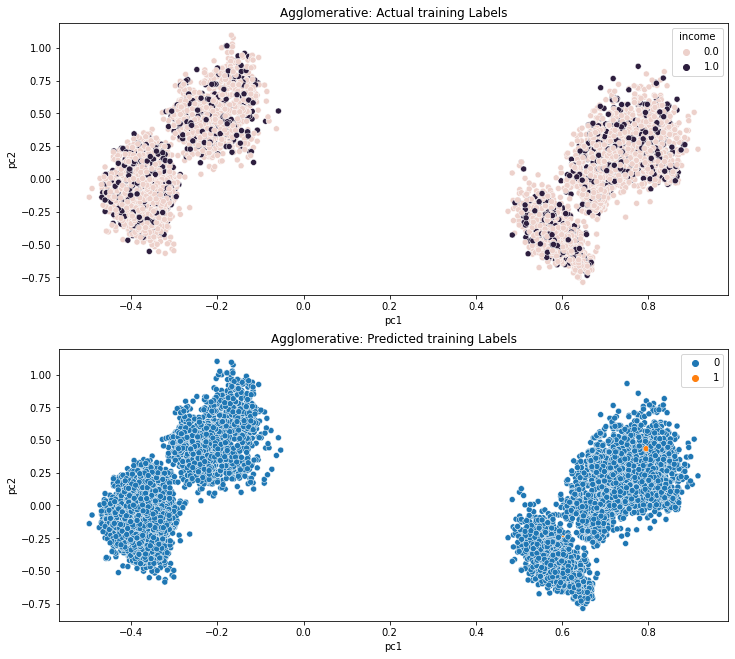

In [100]:
from sklearn.decomposition import PCA

# Visualize the predicted training labels versus actual training labels. 
# The best performed model was average linkage + euclidean which is the one with highest f1-score which
# is  0.4310104676325485.

# Reducing the acttributes to 2 using Principa Component Analysis
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X_train)
X_pca = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])

x = X_pca.iloc[:, 0]
y = X_pca.iloc[:, 1]
plt.figure(figsize=(12, 11))
# scatter plot for actual testing labels
plt.subplot(211)
plt.title('Agglomerative: Actual training Labels')
sns.scatterplot(x = x, y = y, hue = Y_train.income)

# scatter plot for predicted testing labels
plt.subplot(212)
plt.title('Agglomerative: Predicted training Labels')
sns.scatterplot(x = x, y = y, hue = average_euc_pred);


##Compare K-Means Clustering and Hierarchical Agglomerative Clustering

In [101]:
#Visualize Clusters

In [102]:
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
Model = KMeans(n_clusters = 2)
label_kmean = Model.fit_predict(X)

In [103]:
### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X, metric='euclidean')
print('Pairwise Distance Matrix for X:')
print(np.matrix(pdm_train))


Pairwise Distance Matrix for X:
[[0.         0.43313366 0.52823832 ... 1.68784582 0.7755632  1.37825326]
 [0.43313366 0.         0.52446723 ... 1.49693461 0.66537501 1.27464546]
 [0.52823832 0.52446723 0.         ... 1.47708745 0.76243036 1.22663851]
 ...
 [1.68784582 1.49693461 1.47708745 ... 0.         1.52511663 1.07117127]
 [0.7755632  0.66537501 0.76243036 ... 1.52511663 0.         1.24877341]
 [1.37825326 1.27464546 1.22663851 ... 1.07117127 1.24877341 0.        ]]


In [104]:
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
average_euc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(X)
avg_euc_pred_X = average_euc.fit_predict(X)

In [105]:
# Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = pca.fit_transform(X)

In [106]:
# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_pca[:, 0]
y = X_pca[:, 1]

In [107]:
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

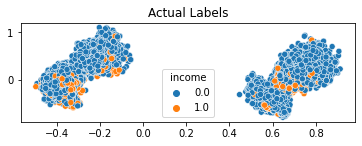

In [108]:
plt.subplot(211)
plt.title('Actual Labels')
sns.scatterplot(x = x, y = y, hue = Y.income)

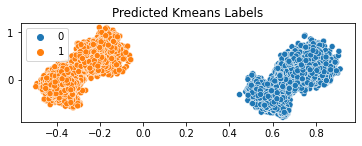

In [109]:
plt.subplot(212)
plt.title('Predicted Kmeans Labels')
sns.scatterplot(x = x, y = y, hue = label_kmean)

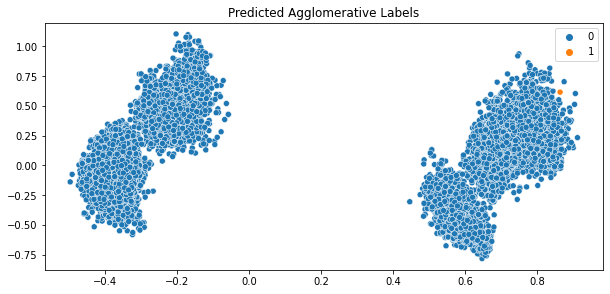

In [110]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Predicted Agglomerative Labels')
sns.scatterplot(x = x, y = y, hue = avg_euc_pred_X);

In [111]:
#Compare K-Means Clustering & Hierarchical Agglomerative Clustering

In [112]:
print("Agglomerative: Confusion Matrix for average linkage + euclidean:")
print(confusion_matrix(Y,avg_euc_pred_X))
print("K-Means: Confusion Matrix for 2 clusters:")
print(confusion_matrix(Y,label_kmean))

print('')
print('Agglomerative Classification Report:')
print(classification_report(Y, avg_euc_pred_X))
print('K-Means Classification Report:')
print(classification_report(Y, label_kmean))

Agglomerative: Confusion Matrix for average linkage + euclidean:
[[24718     2]
 [ 7841     0]]
K-Means: Confusion Matrix for 2 clusters:
[[ 9592 15128]
 [ 1179  6662]]

Agglomerative Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     24720
         1.0       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
   macro avg       0.38      0.50      0.43     32561
weighted avg       0.58      0.76      0.66     32561

K-Means Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.39      0.54     24720
         1.0       0.31      0.85      0.45      7841

    accuracy                           0.50     32561
   macro avg       0.60      0.62      0.50     32561
weighted avg       0.75      0.50      0.52     32561



#Apriori Frequent Pattern Mining (improved using Sampling)

In [113]:
# Importing required libraries
from itertools import combinations
import time

In [114]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = heading)

In [115]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [116]:
# Removing irrelevant columns

df.drop(['fnlwgt', 'education-num'], axis = 1, inplace = True)
df.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [117]:
# Size of original data

df.shape

(32561, 13)

In [118]:
# Removing missing values from data
df.replace(' ?', np.NaN, inplace = True)
df.dropna(axis = 0, inplace = True)

# Size of data after removing missing values
df.shape

(30162, 13)

In [119]:
# Converting numeric data to categorical data
df['age'] = pd.cut(df['age'], [0, 25, 40, np.inf], labels=["young", "middle_aged", "old"])
df['capital-gain'] = pd.cut(df['capital-gain'], [-1, 1, np.inf], labels=["No_Gain", "Gain"])
df['capital-loss'] = pd.cut(df['capital-loss'], [-1, 1, np.inf], labels=["No_Loss", "Loss"])
df['hours-per-week'] = pd.cut(df['hours-per-week'], [-1, 5, 20, 60, np.inf], labels=["Less", "Medium", "Reasonable", "High"])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,middle_aged,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Gain,No_Loss,Reasonable,United-States,<=50K
1,old,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,No_Gain,No_Loss,Medium,United-States,<=50K
2,middle_aged,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,No_Gain,No_Loss,Reasonable,United-States,<=50K
3,old,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,No_Gain,No_Loss,Reasonable,United-States,<=50K
4,middle_aged,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,No_Gain,No_Loss,Reasonable,Cuba,<=50K


In [120]:
# Generate a sampled dataset from the input data
def sampling(df, samplingFactor):
    sampledData = df.sample(frac = samplingFactor)
    return sampledData

In [121]:
# Generating Candidate 1
def C1(data):
    candidates = {} # empty dictionary to store each item as key and its count as value
    for i in data.index:
        for j in data.loc[i]:
            if (j in candidates): 
                candidates[j] += 1
            else: 
                candidates[j] = 1
    print("\nC1: \n", candidates)
    return candidates

In [122]:
# Generating L1
def L1(c, support):
    l1 = {} # dictionary to store all the items having support more than or equal to minimum support
    l1 = dict((k,v) for k, v in c.items() if v >= support)
    print("\n\nL1: \n", l1)
    return l1

In [123]:
# Function to check if candidate itemset contains infrequent subset
def has_infrequent_subset(candidate, freq, prevL):
    for i in list(combinations(candidate,freq-1)):
        if i not in prevL:
            return True
        return False

In [124]:
# Generating Candidate k
def Ck(k, prevL, df):
    
    # Join
    # For C2:
    if k == 2:
        c = list()
        for key,v in prevL.items():
            if key not in c:
                c.append(key)
            
    # When k is greater than 2, L (k-1) contains list of tuples
    if k > 2:
        c = list()
        for key,v in prevL.items():
            for item in key:
                if item not in c:
                    c.append(item)
                    
    candidates = {} # To store all the candidate items along with its count
    cand = list(combinations(c, k))
    
    # Prune
    for cd in cand:
        if (has_infrequent_subset(cd, k, prevL) == True):
            cand.remove(cd)
            
    for i in cand:
        candidates[i] = 0
    for ind in df.index:
        for i in candidates:
            if set(i).issubset(df.loc[ind]):
                candidates[i] +=1
                
    print("\n\nC", k, ":\n", candidates)
    return candidates


In [125]:
# Generating Lk
def Lk(k, ck, support):
    lk = {}
    # lk contains all the values having support more than minimum support threshold
    lk = dict((key,v) for key, v in ck.items() if v >= support)
    print("\n\nL", k, ":\n", lk)
    return lk

In [126]:
# Function for Apriori Algorithm
def apriori(data, support, samplingFactor):
    
    s = int((support/100)*0.9*len(data))
    df = sampling(data, samplingFactor)
    t1 = time.time()
    
    print("Minimum support = ", s)
    
    lk = {}
    candidateK = {}
    candidateK = C1(df)
    lk = L1(candidateK, s)
    
    k = 2
    while lk != {}:
        candidateK = Ck(k, lk, data)
        lk = Lk(k, candidateK, s)
        k += 1
    t2 = time.time()
    
    exec_time = t2 - t1
    
    print("\nTotal execution time = ", exec_time)

    return

In [127]:
apriori(df, 50, 0.6)

Minimum support =  13572

C1: 
 {'old': 7409, ' Local-gov': 1249, ' Some-college': 4008, ' Divorced': 2510, ' Adm-clerical': 2186, ' Unmarried': 1930, ' White': 15582, ' Female': 5820, 'No_Gain': 16560, 'No_Loss': 17249, 'Reasonable': 16048, ' United-States': 16543, ' <=50K': 13598, 'middle_aged': 7300, ' Private': 13417, ' 9th': 279, ' Never-married': 5851, ' Machine-op-inspct': 1186, ' Other': 141, ' Male': 12277, ' Mexico': 347, ' Bachelors': 3035, ' Sales': 2168, ' Not-in-family': 4636, ' HS-grad': 5965, 'Gain': 1537, ' Married-civ-spouse': 8451, ' Husband': 7510, ' >50K': 4499, ' State-gov': 745, ' Prof-specialty': 2406, ' Black': 1641, ' Protective-serv': 372, ' Tech-support': 554, ' Own-child': 2654, 'young': 3388, ' Craft-repair': 2390, ' 11th': 642, ' 7th-8th': 331, ' Puerto-Rico': 59, 'High': 629, ' Self-emp-inc': 633, 'Loss': 848, ' Self-emp-not-inc': 1503, ' Married-spouse-absent': 207, ' Farming-fishing': 611, 'Medium': 1351, ' Other-service': 1913, ' Handlers-cleaners': 8

In [128]:
#Thank you!